**Importing Libraries And Mounting Data**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [154]:
df=pd.read_csv('data.csv')

In [155]:
df.shape

(504989, 31)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504989 entries, 0 to 504988
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   search_term                         504989 non-null  object 
 1   product_variant_id                  504989 non-null  object 
 2   city_id                             504989 non-null  object 
 3   query_type                          504989 non-null  object 
 4   is_clicked                          504989 non-null  float64
 5   total_clicks                        504989 non-null  int64  
 6   session_views                       504989 non-null  int64  
 7   query_products_clicks_last_30_days  504989 non-null  int64  
 8   CTR_last_30_days                    504989 non-null  float64
 9   CTR_last_7_days                     504989 non-null  float64
 10  CTR_product_30_days                 504989 non-null  float64
 11  query_product_plt_clicks_6

In [157]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [158]:
df.head(5)

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,predicted_category_name,predicted_subcategory_name,query_product_plt_clicks_30_days,product_name,brand_name,category_name,subcategory_name,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,0.000000,0,0.00000,0.234505,"{'Dairy, Bread & Eggs': 1, 'Cold Drinks & Juic...","{'Milk': 1, 'Milk Drinks': 0.5, 'Yogurts & Dah...",0,Cadbury Dairy Milk Chocolate Bar,Dairy Milk,Sweet Cravings,Chocolates,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,0.003239,0,0.00000,0.011633,"{'Ice Creams & More': 1, 'Zepto Cafe': 2}",{'Ice Cubes & Ice Pops': 1},0,Noto Roasted Hazelnut Bar Ice Cream Stick,Noto,Ice Creams & More,Sticks,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,0.061085,317,0.05352,0.066489,"{'Munchies': 1, 'Health & Wellness': 0.5, 'Zep...","{'Energy Bars': 1, 'Fitness': 0.5, 'Cookies': ...",198,RiteBite Max Protein Cookies Choco Chips Biscu...,Max Protien,Munchies,Energy Bars,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,0.000000,0,0.00000,0.258667,"{'Cleaning Essentials': 1, 'Electricals & Acce...","{'Laundry Additives': 1, 'Home Electronics': 0...",0,Bisleri Packaged Drinking Water Jar,Bisleri,Cold Drinks & Juices,Water,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,0.052714,0,0.00000,0.000000,"{'Makeup & Beauty': 1, 'Grooming Essentials': ...","{'Nails': 1, 'Beauty Accessories': 0.5, 'Hygie...",0,Veet Hair Removal Wax Strips - Sensitive Skin,Veet,Feminine Hygiene,Hair Removal,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254


#**EDA**

In [159]:
df.columns.tolist()

['search_term',
 'product_variant_id',
 'city_id',
 'query_type',
 'is_clicked',
 'total_clicks',
 'session_views',
 'query_products_clicks_last_30_days',
 'CTR_last_30_days',
 'CTR_last_7_days',
 'CTR_product_30_days',
 'query_product_plt_clicks_60_days',
 'query_product_plt_ctr_60_days',
 'CTR_plt_30_days',
 'predicted_category_name',
 'predicted_subcategory_name',
 'query_product_plt_clicks_30_days',
 'product_name',
 'brand_name',
 'category_name',
 'subcategory_name',
 'latest_margin',
 'savings',
 'savings_with_pass',
 'ad_revenue',
 'total_unique_orders',
 'product_atcs_30_days',
 'product_atcs_plt_30_days',
 'total_unique_orders_plt_30_days',
 'product_ctr_city_30_days',
 'query_product_similarity']

In [160]:
# Handling columns with missing values

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
search_term                               0
product_variant_id                        0
city_id                                   0
query_type                                0
is_clicked                                0
total_clicks                              0
session_views                             0
query_products_clicks_last_30_days        0
CTR_last_30_days                          0
CTR_last_7_days                           0
CTR_product_30_days                       0
query_product_plt_clicks_60_days          0
query_product_plt_ctr_60_days             0
CTR_plt_30_days                           0
predicted_category_name                   0
predicted_subcategory_name                0
query_product_plt_clicks_30_days          0
product_name                          11019
brand_name                            63744
category_name                         11019
subcategory_name                      11019
latest_margin                      

In [161]:
# df = df.dropna()

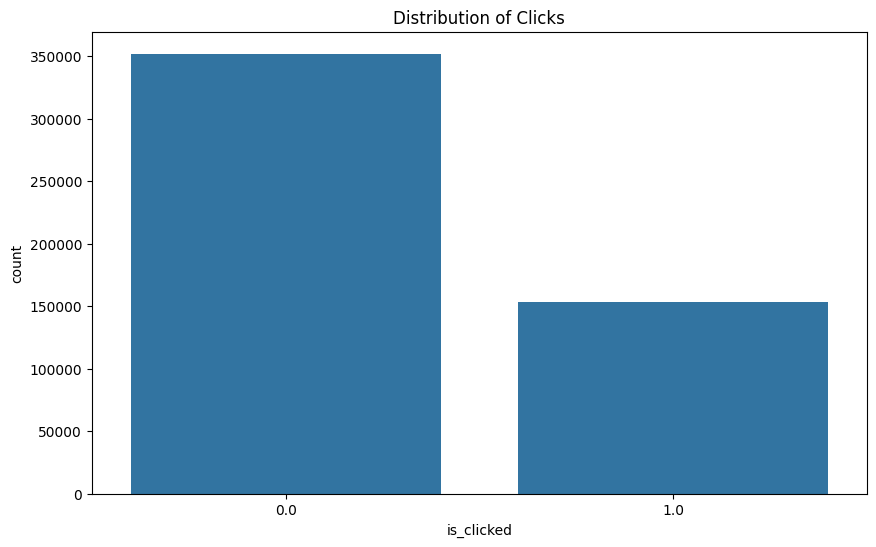

In [162]:
# Distribution of target variable
# This bar chart displays the distribution of the is_clicked variable, indicating whether a product was clicked (1) or not clicked (0). 
# The x-axis shows the two categories, while the y-axis represents the count of occurrences for each category. 
# The chart reveals the proportion of clicks versus non-clicks, providing insight into user interaction patterns in the dataset. 
plt.figure(figsize=(10,6))
sns.countplot(x='is_clicked', data=df)
plt.title('Distribution of Clicks')
plt.show()


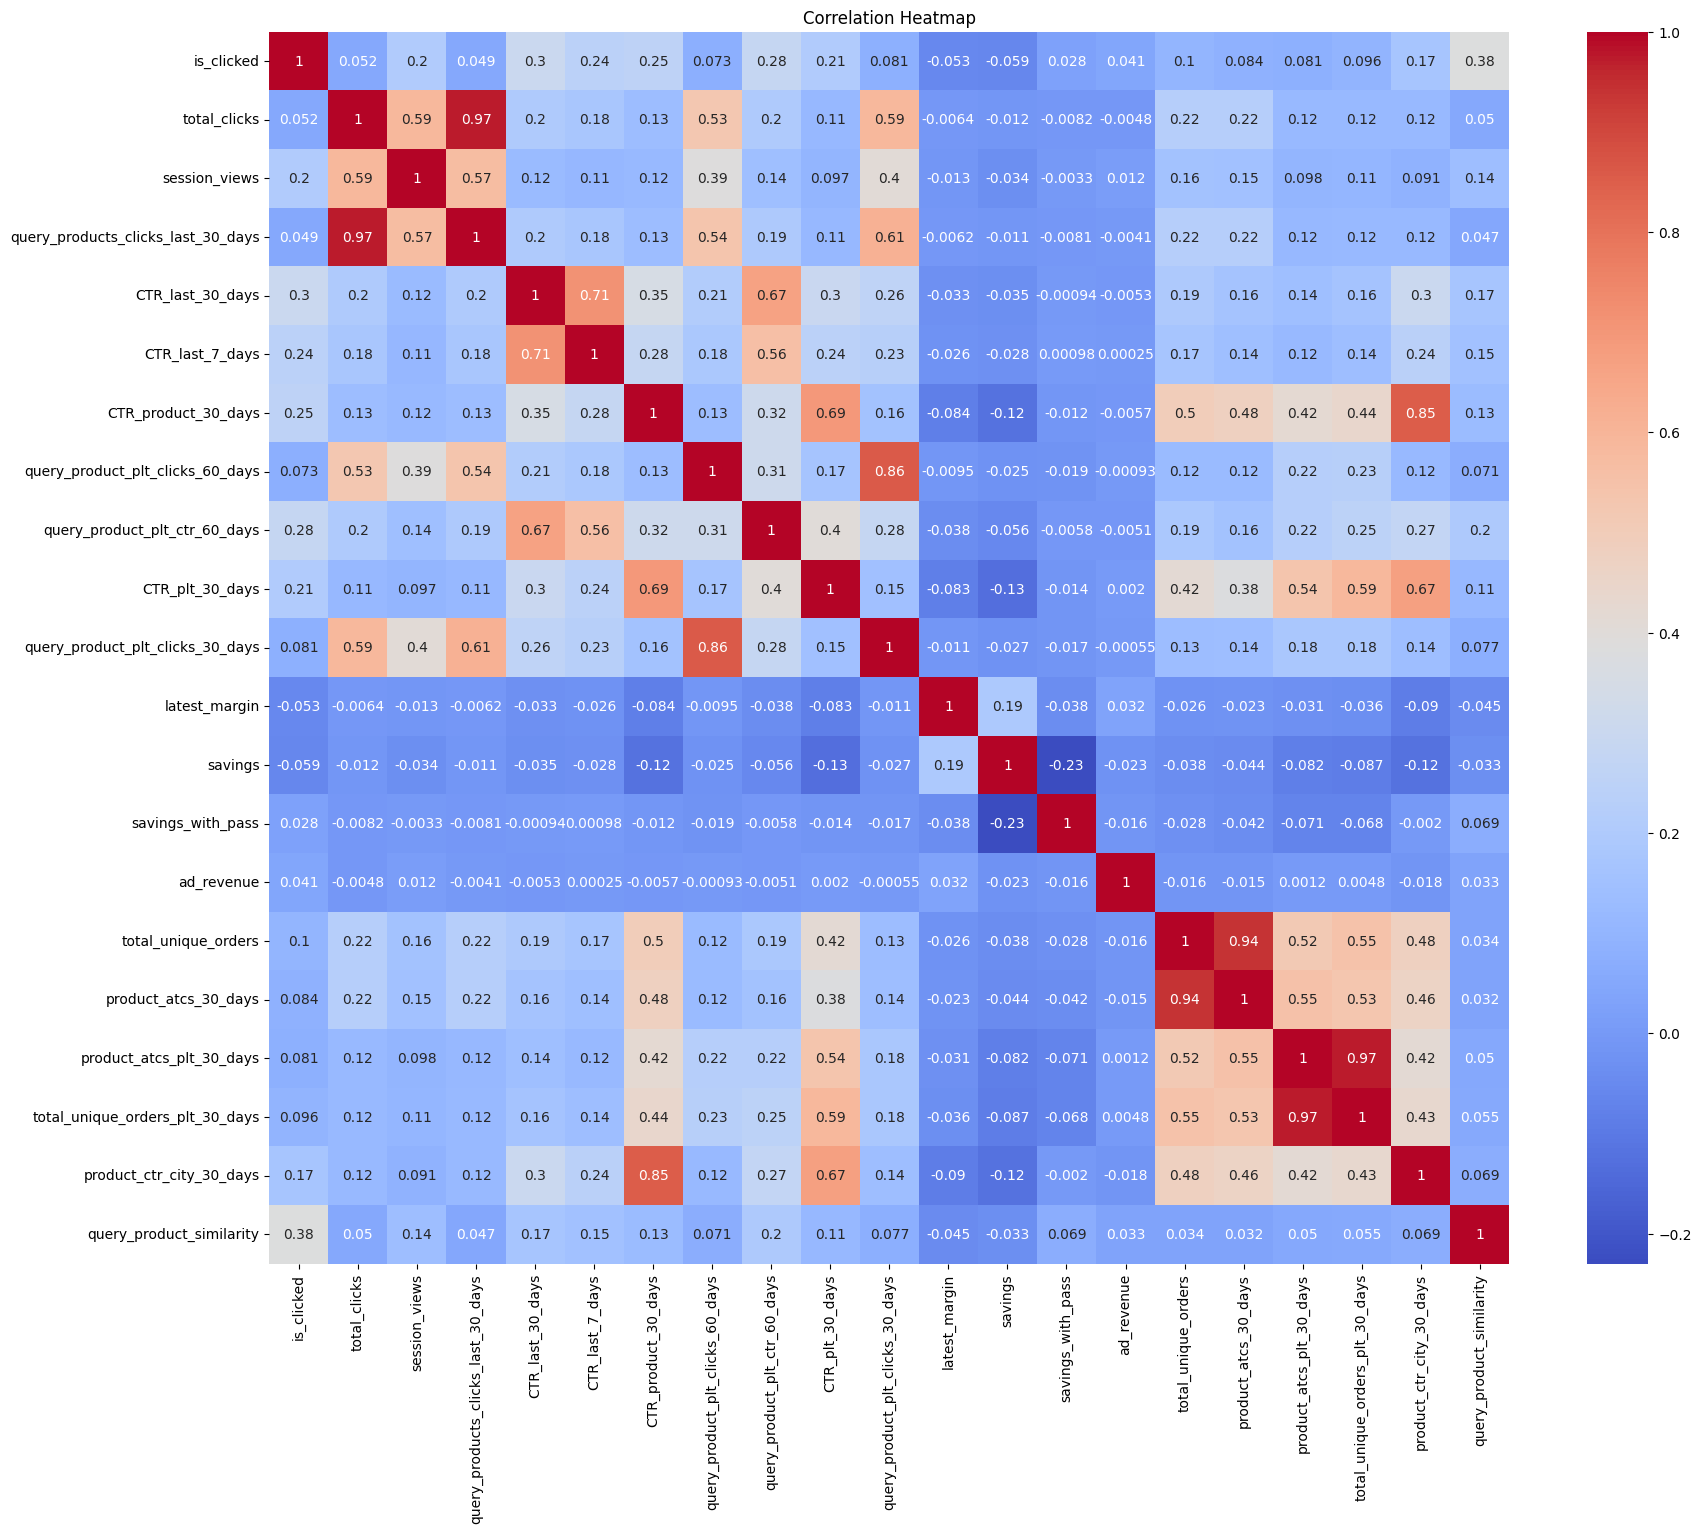

In [163]:
# This heatmap visualizes the correlation matrix for the numerical features in the dataset. 
# The corr matrix measures the linear relationship between each pair of features. 
# The color intensity represents the strength and direction of the correlations, with darker shades indicating stronger correlations, either positive or negative. 
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

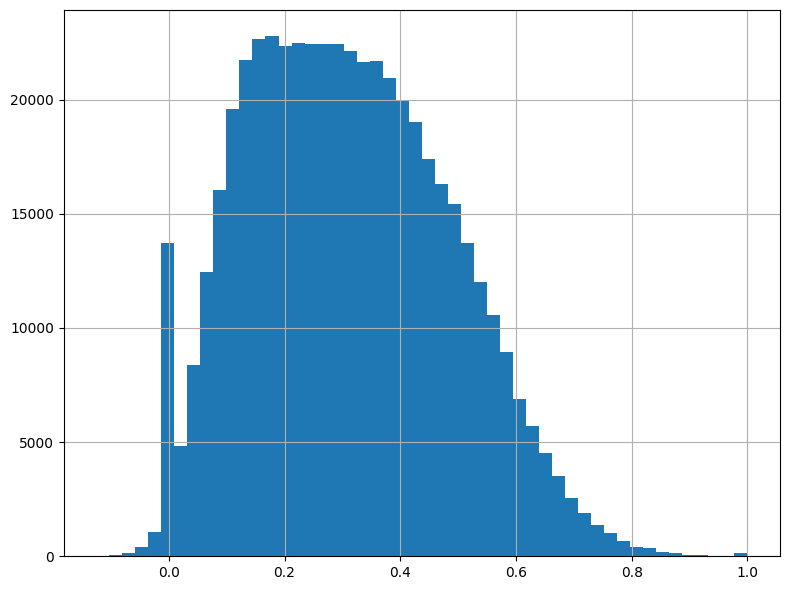

In [164]:
# This histogram shows the distribution of query_product_similarity scores, with most values falling in the moderate range and fewer high similarity scores.
# The graph is normally distributed but right-skewed, indicating a few highly relevant product matches. 
# This suggests potential for improving search algorithms and enhancing user experience by focusing on these high similarity instances.
df['query_product_similarity'].hist(figsize=(8,6), bins=50)
plt.tight_layout()
plt.show()

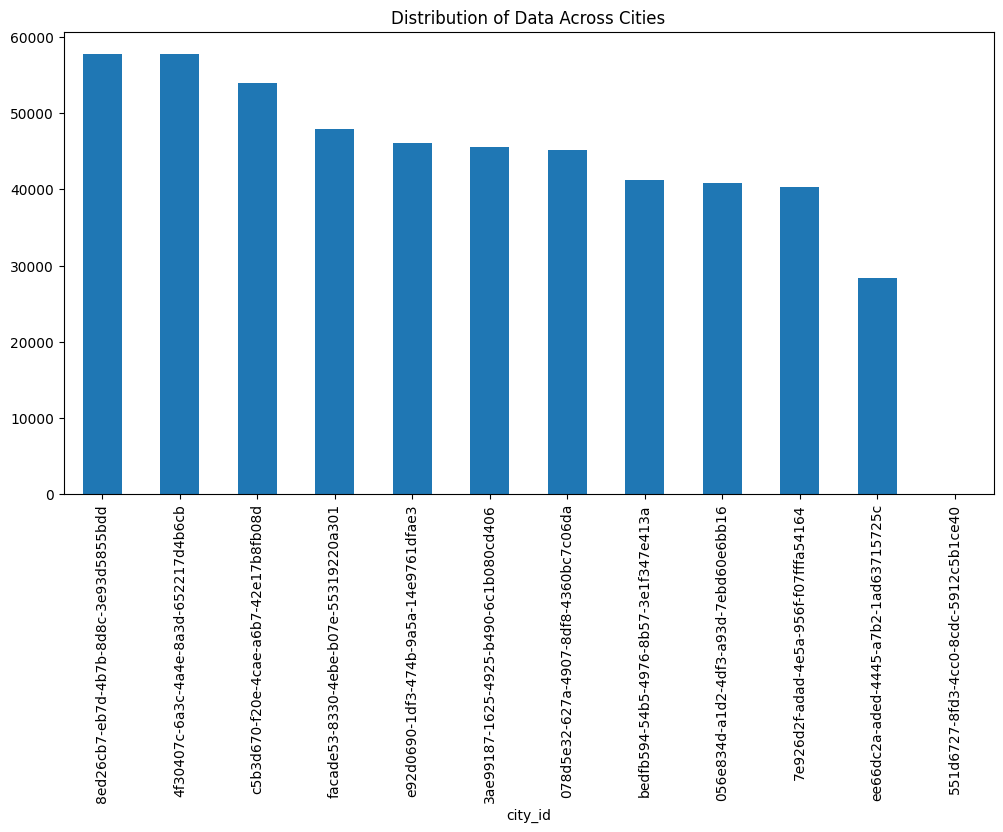

In [165]:
plt.figure(figsize=(12,6))
df['city_id'].value_counts().plot(kind='bar')
plt.title('Distribution of Data Across Cities')
plt.show()


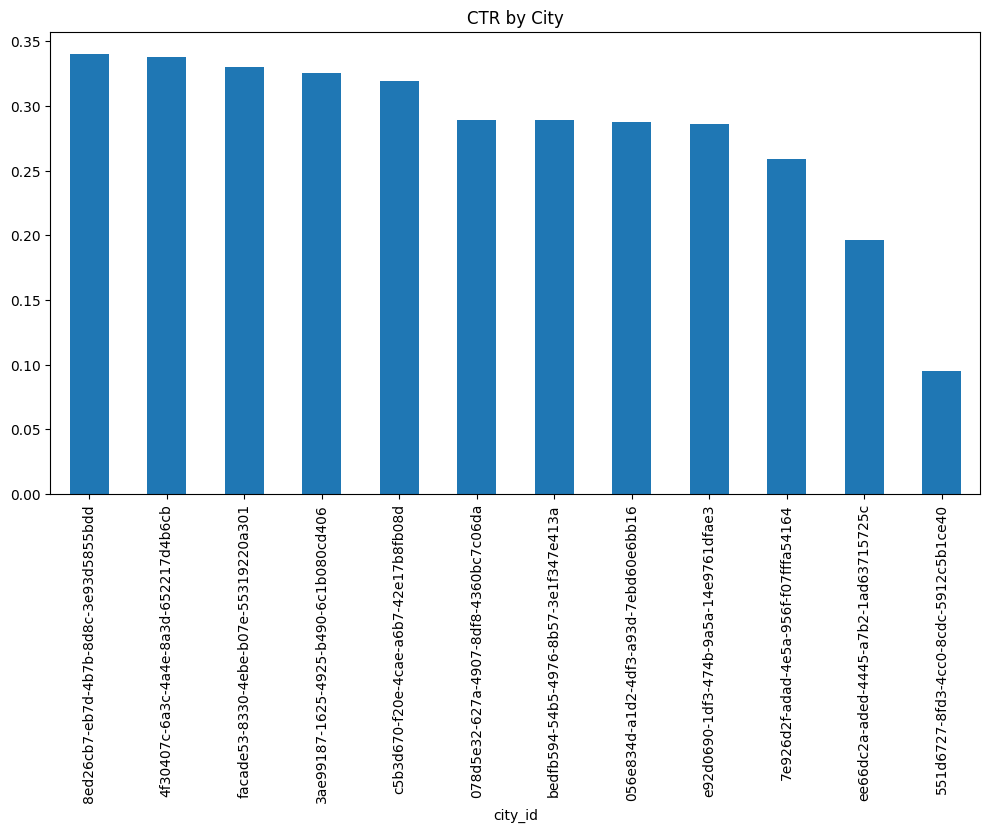

In [166]:
city_ctr = df.groupby('city_id')['is_clicked'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
city_ctr.plot(kind='bar')
plt.title('CTR by City')
plt.show()

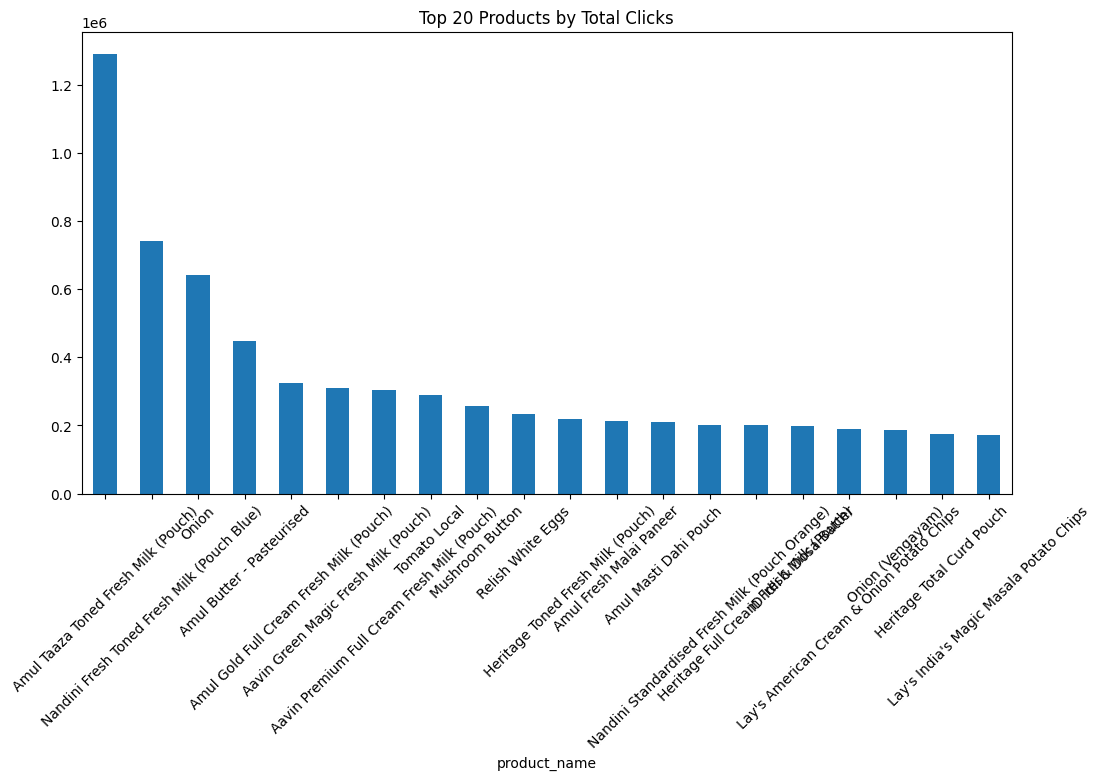

In [167]:
top_products = df.groupby('product_name')['total_clicks'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title('Top 20 Products by Total Clicks')
plt.xticks(rotation=45)
plt.show()

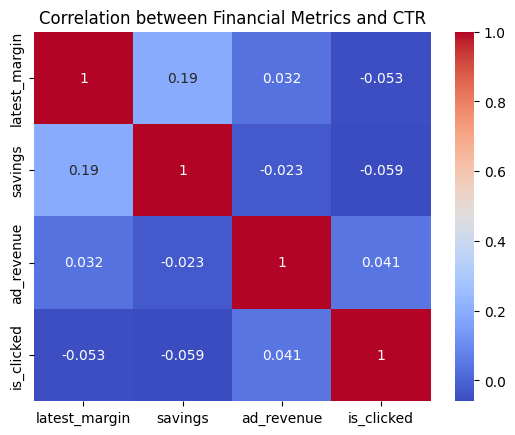

In [168]:
financial_metrics = ['latest_margin', 'savings', 'ad_revenue']
correlation = df[financial_metrics + ['is_clicked']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Financial Metrics and CTR')
plt.show()

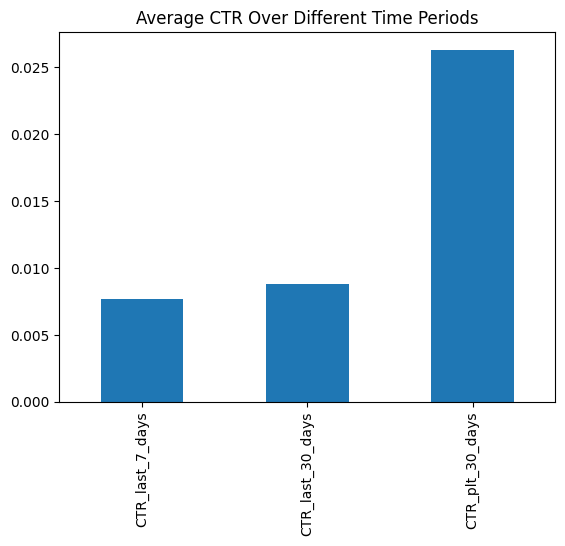

In [169]:
time_metrics = ['CTR_last_7_days', 'CTR_last_30_days', 'CTR_plt_30_days']
df[time_metrics].mean().plot(kind='bar')
plt.title('Average CTR Over Different Time Periods')
plt.show()

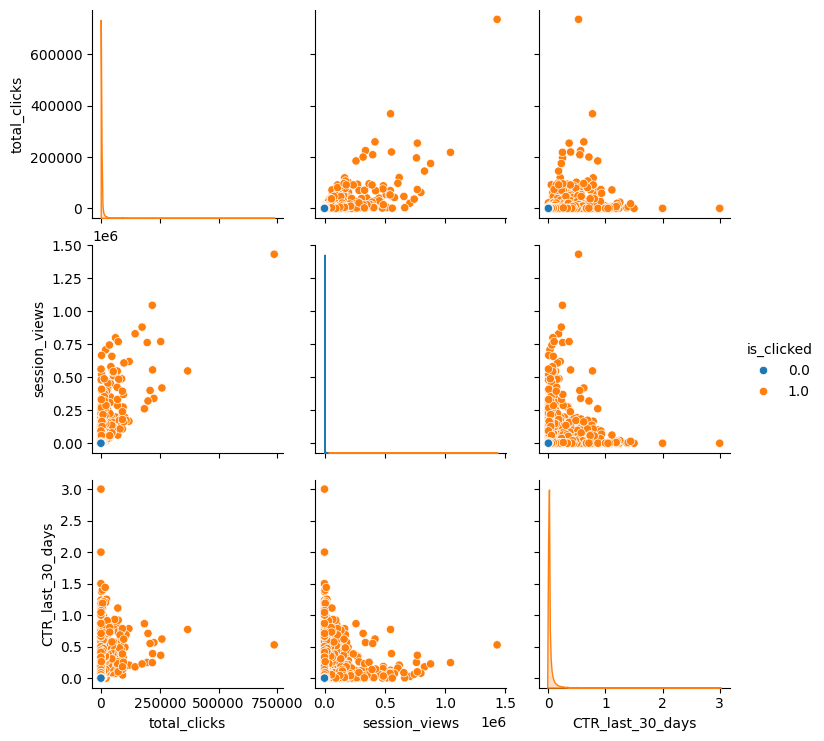

In [170]:
sns.pairplot(df[['total_clicks', 'session_views', 'CTR_last_30_days', 'is_clicked']], hue='is_clicked')
plt.show()


In [171]:
df_cleaned = df.dropna()

# **Data Preprocessing**



In [172]:
grouped_df = df.groupby(['city_id','search_term', 'product_name'],  as_index=False)[['total_clicks', 'session_views']].sum()
# gg.first()
grouped_df.tail(1)

,city_id,search_term,product_name,total_clicks,session_views
484090,facade53-8330-4ebe-b07e-55319220a301,zorabian,Zorabian Chicken Seekh Kebab,32,335


In [173]:
grouped_df['ctr'] = grouped_df['total_clicks']/(grouped_df['session_views'] + 1) * 100

In [174]:
final = grouped_df[(grouped_df['session_views'] > 0)& (grouped_df['total_clicks']<grouped_df['session_views'])]

In [175]:
final['ctr'] = final['total_clicks']/(final['session_views'] + 1) * 100

C:\Users\Abhin\AppData\Local\Temp\ipykernel_6800\157641944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['ctr'] = final['total_clicks']/(final['session_views'] + 1) * 100


In [176]:
final.sort_values(by='ctr', ascending=False).head(20)

,city_id,search_term,product_name,total_clicks,session_views,ctr
56205,078d5e32-627a-4907-8df8-4360bc7c06da,fine touch,Marlboro Fine Touch,5078,5170,98.201508
244815,8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd,good life,Nandini Goodlife Toned UHT Milk (Fino Pouch),4509,4670,96.531792
1236,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,amul gold,Amul Gold Full Cream Fresh Milk (Pouch),5307,5530,95.950099
120886,3ae99187-1625-4925-b490-6c1b080cd406,sting,Sting Energy Drink Pet,7620,8353,91.213790
241188,8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd,fine touch,Marlboro Fine Touch,4154,4557,91.136463
408294,e92d0690-1df3-474b-9a5a-14e9761dfae3,tomato puree,Dabur Hommade Tomato Puree,6538,7181,91.033138
414931,ee66dc2a-aded-4445-a7b2-1ad63715725c,buttermilk,Amul Probiotic Buttermilk,1210,1330,90.909091
299224,bedfb594-54b5-4976-8b57-3e1f347e413a,milky bar,Nestle Milkybar Tablet Made With Milk Yummy & ...,869,961,90.332640
374269,e92d0690-1df3-474b-9a5a-14e9761dfae3,chach,Amul Probiotic Tadka Chaas,35796,40024,89.434104
89783,3ae99187-1625-4925-b490-6c1b080cd406,chaach,Amul Masti Spiced Buttermilk,25,27,89.285714


In [177]:
# df_cleaned = df.dropna()

In [178]:
final_merged = pd.merge(final, df_cleaned, on=['city_id', 'search_term','product_name'], how='inner')

In [179]:
final_merged.head(5)

,city_id,search_term,product_name,total_clicks_x,session_views_x,ctr,product_variant_id,query_type,is_clicked,total_clicks_y,session_views_y,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,predicted_category_name,predicted_subcategory_name,query_product_plt_clicks_30_days,brand_name,category_name,subcategory_name,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Continental THIS Cappuccino 3-in-1 Premix Coffee,0,1,0.0,80f9004b-f81e-4809-9d09-acb4786f9c94,head,0.0,0,1,0,0.0,0.0,0.004118,0,0.0,0.006308,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Continental,"Tea, Coffee & More",Coffee,40.500000,0.013968,4.812616,20.550248,69,176,2409,1181,0.004118,0.167155
1,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"FACES CANADA Strobe Cream - Rose Gold, With Sh...",0,1,0.0,55bad5a5-cfae-4d0e-83ab-54a0a630996b,head,0.0,0,1,0,0.0,0.0,0.003090,0,0.0,0.012750,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Faces Canada,Makeup & Beauty,Face Makeup,85.850476,0.196677,4.213292,0.000000,9,88,3764,832,0.003090,0.278706
2,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Heavy Duty Padlock With 3 Keys -63Mm,0,1,0.0,4328cb3c-1357-4906-a3ab-60c2d5d36717,head,0.0,0,1,0,0.0,0.0,0.002746,0,0.0,0.000000,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Se7en,Home Needs,Utility & Organizer,79.341429,0.224777,4.872615,0.000000,17,41,1428,734,0.002746,0.230812
3,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"L'Oreal Excellence Creme Hair Color, 3 Dark Brown",0,2,0.0,5c947d31-97be-47aa-9802-6b013dab723a,head,0.0,0,2,0,0.0,0.0,0.005062,0,0.0,0.011239,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,L'Oreal,Hair Care,Hair Color,64.992800,0.038112,2.137468,0.000000,79,149,3643,2145,0.005062,0.314685
4,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Lakme 9TO5 Primer + Matte Lip Color Rose Day,0,1,0.0,41a065c8-6b24-4b79-82de-97761c97d4b3,head,0.0,0,1,0,0.0,0.0,0.000000,0,0.0,0.000873,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Lakme,Makeup & Beauty,Lips Makeup,93.032381,0.081525,4.673901,0.000000,7,12,206,35,0.000000,0.305902


In [180]:
final_merged.isnull().sum()

city_id                               0
search_term                           0
product_name                          0
total_clicks_x                        0
session_views_x                       0
ctr                                   0
product_variant_id                    0
query_type                            0
is_clicked                            0
total_clicks_y                        0
session_views_y                       0
query_products_clicks_last_30_days    0
CTR_last_30_days                      0
CTR_last_7_days                       0
CTR_product_30_days                   0
query_product_plt_clicks_60_days      0
query_product_plt_ctr_60_days         0
CTR_plt_30_days                       0
predicted_category_name               0
predicted_subcategory_name            0
query_product_plt_clicks_30_days      0
brand_name                            0
category_name                         0
subcategory_name                      0
latest_margin                         0


In [181]:
final_merged.shape

(399139, 34)

In [182]:
final_merged.columns

Index(['city_id', 'search_term', 'product_name', 'total_clicks_x',
       'session_views_x', 'ctr', 'product_variant_id', 'query_type',
       'is_clicked', 'total_clicks_y', 'session_views_y',
       'query_products_clicks_last_30_days', 'CTR_last_30_days',
       'CTR_last_7_days', 'CTR_product_30_days',
       'query_product_plt_clicks_60_days', 'query_product_plt_ctr_60_days',
       'CTR_plt_30_days', 'predicted_category_name',
       'predicted_subcategory_name', 'query_product_plt_clicks_30_days',
       'brand_name', 'category_name', 'subcategory_name', 'latest_margin',
       'savings', 'savings_with_pass', 'ad_revenue', 'total_unique_orders',
       'product_atcs_30_days', 'product_atcs_plt_30_days',
       'total_unique_orders_plt_30_days', 'product_ctr_city_30_days',
       'query_product_similarity'],
      dtype='object')

In [183]:
for col in final_merged.columns:
    if col not in df_cleaned.columns:
        print(col)

total_clicks_x
session_views_x
ctr
total_clicks_y
session_views_y


In [184]:
final.shape

(436546, 6)

In [186]:
final.sort_values(by='ctr', ascending = False).head()

,city_id,search_term,product_name,total_clicks,session_views,ctr
56205,078d5e32-627a-4907-8df8-4360bc7c06da,fine touch,Marlboro Fine Touch,5078,5170,98.201508
244815,8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd,good life,Nandini Goodlife Toned UHT Milk (Fino Pouch),4509,4670,96.531792
1236,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,amul gold,Amul Gold Full Cream Fresh Milk (Pouch),5307,5530,95.950099
120886,3ae99187-1625-4925-b490-6c1b080cd406,sting,Sting Energy Drink Pet,7620,8353,91.213790
241188,8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd,fine touch,Marlboro Fine Touch,4154,4557,91.136463


In [187]:
print(final.shape)

(436546, 6)


In [188]:
final.head()

,city_id,search_term,product_name,total_clicks,session_views,ctr
3,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Continental THIS Cappuccino 3-in-1 Premix Coffee,0,1,0.0
5,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"FACES CANADA Strobe Cream - Rose Gold, With Sh...",0,1,0.0
9,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Heavy Duty Padlock With 3 Keys -63Mm,0,1,0.0
12,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"L'Oreal Excellence Creme Hair Color, 3 Dark Brown",0,2,0.0
14,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Lakme 9TO5 Primer + Matte Lip Color Rose Day,0,1,0.0


In [189]:
final_merged.head()

,city_id,search_term,product_name,total_clicks_x,session_views_x,ctr,product_variant_id,query_type,is_clicked,total_clicks_y,session_views_y,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,predicted_category_name,predicted_subcategory_name,query_product_plt_clicks_30_days,brand_name,category_name,subcategory_name,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Continental THIS Cappuccino 3-in-1 Premix Coffee,0,1,0.0,80f9004b-f81e-4809-9d09-acb4786f9c94,head,0.0,0,1,0,0.0,0.0,0.004118,0,0.0,0.006308,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Continental,"Tea, Coffee & More",Coffee,40.500000,0.013968,4.812616,20.550248,69,176,2409,1181,0.004118,0.167155
1,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"FACES CANADA Strobe Cream - Rose Gold, With Sh...",0,1,0.0,55bad5a5-cfae-4d0e-83ab-54a0a630996b,head,0.0,0,1,0,0.0,0.0,0.003090,0,0.0,0.012750,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Faces Canada,Makeup & Beauty,Face Makeup,85.850476,0.196677,4.213292,0.000000,9,88,3764,832,0.003090,0.278706
2,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Heavy Duty Padlock With 3 Keys -63Mm,0,1,0.0,4328cb3c-1357-4906-a3ab-60c2d5d36717,head,0.0,0,1,0,0.0,0.0,0.002746,0,0.0,0.000000,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Se7en,Home Needs,Utility & Organizer,79.341429,0.224777,4.872615,0.000000,17,41,1428,734,0.002746,0.230812
3,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,"L'Oreal Excellence Creme Hair Color, 3 Dark Brown",0,2,0.0,5c947d31-97be-47aa-9802-6b013dab723a,head,0.0,0,2,0,0.0,0.0,0.005062,0,0.0,0.011239,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,L'Oreal,Hair Care,Hair Color,64.992800,0.038112,2.137468,0.000000,79,149,3643,2145,0.005062,0.314685
4,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,3 roses,Lakme 9TO5 Primer + Matte Lip Color Rose Day,0,1,0.0,41a065c8-6b24-4b79-82de-97761c97d4b3,head,0.0,0,1,0,0.0,0.0,0.000000,0,0.0,0.000873,"{'Tea, Coffee & More': 1, 'Zepto Cafe': 2}",{'Tea': 1},0,Lakme,Makeup & Beauty,Lips Makeup,93.032381,0.081525,4.673901,0.000000,7,12,206,35,0.000000,0.305902


In [190]:
# Handling columns with missing values

# Count the number of missing values in each column
missing_values = final_merged.isnull().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
city_id                               0
search_term                           0
product_name                          0
total_clicks_x                        0
session_views_x                       0
ctr                                   0
product_variant_id                    0
query_type                            0
is_clicked                            0
total_clicks_y                        0
session_views_y                       0
query_products_clicks_last_30_days    0
CTR_last_30_days                      0
CTR_last_7_days                       0
CTR_product_30_days                   0
query_product_plt_clicks_60_days      0
query_product_plt_ctr_60_days         0
CTR_plt_30_days                       0
predicted_category_name               0
predicted_subcategory_name            0
query_product_plt_clicks_30_days      0
brand_name                            0
category_name                         0
subcategory_name                      0

In [191]:
# df_cleaned = df.dropna()

In [192]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the data types of each column
print(final.dtypes)

city_id           object
search_term       object
product_name      object
total_clicks       int64
session_views      int64
ctr              float64
dtype: object


In [193]:
# Creating lists with columns containing object and non-object data type
categorical_columns = final_merged.select_dtypes(include=['object']).columns
non_categorical_columns = final_merged.select_dtypes(exclude=['object']).columns.tolist()

In [194]:
target_column = 'Target'

# Remove the target column from non_categorical_columns
if target_column in non_categorical_columns:
    non_categorical_columns.remove(target_column)


In [195]:
# Checking for missing values in the entire DataFrame
missing_values = final_merged.isnull().sum()

# Checking if there are any missing values
if missing_values.sum() > 0:
    print("1")
else:
    print("0")


0


In [196]:
unique_values_count = final_merged.nunique()

In [197]:
sorted_unique_values_count = unique_values_count.sort_values()
sorted_unique_values_count

query_type                                 2
is_clicked                                 2
city_id                                   12
category_name                             38
subcategory_name                         280
predicted_category_name                  481
predicted_subcategory_name              1603
brand_name                              1823
search_term                             1994
query_products_clicks_last_30_days      2109
total_clicks_y                          3496
total_clicks_x                          3497
query_product_plt_clicks_30_days        4158
total_unique_orders_plt_30_days         5175
total_unique_orders                     5429
query_product_plt_clicks_60_days        5442
product_atcs_plt_30_days                7106
product_atcs_30_days                    7970
CTR_last_7_days                        15072
session_views_y                        18921
session_views_x                        18933
CTR_plt_30_days                        19887
product_na

In [198]:
#checking for duplicated rows
duplicate_rows = final_merged[final_merged.duplicated()]
duplicate_rows.shape

(0, 34)

In [199]:
final_merged.shape

(399139, 34)

In [200]:
# Creating lists with columns containing object and non-object data type
categorical_columns = final_merged.select_dtypes(include=['object']).columns
non_categorical_columns = final_merged.select_dtypes(exclude=['object']).columns

for col in categorical_columns:

  final_merged[col] = final_merged[col].astype(str)
  label_encoder = LabelEncoder()
  final_merged[col] = label_encoder.fit_transform(final_merged[col])


#**Feature Selection**

In [201]:
nan_counts = final_merged.isna().sum()

# Display the counts of NaN values
print(nan_counts)

city_id                               0
search_term                           0
product_name                          0
total_clicks_x                        0
session_views_x                       0
ctr                                   0
product_variant_id                    0
query_type                            0
is_clicked                            0
total_clicks_y                        0
session_views_y                       0
query_products_clicks_last_30_days    0
CTR_last_30_days                      0
CTR_last_7_days                       0
CTR_product_30_days                   0
query_product_plt_clicks_60_days      0
query_product_plt_ctr_60_days         0
CTR_plt_30_days                       0
predicted_category_name               0
predicted_subcategory_name            0
query_product_plt_clicks_30_days      0
brand_name                            0
category_name                         0
subcategory_name                      0
latest_margin                         0


In [202]:
from sklearn.feature_selection import mutual_info_regression
# Define the target column
target = 'ctr'

# Separate the features and the target variable
X = final_merged.drop(target, axis=1)  # Features
y = final_merged[target]  # Target variable

# Compute mutual information for each feature
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to display the results
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display the results
print(mi_df)

                               Feature  Mutual_Information
4                      session_views_x            1.447357
9                      session_views_y            1.336470
3                       total_clicks_x            0.887508
8                       total_clicks_y            0.843780
11                    CTR_last_30_days            0.686597
7                           is_clicked            0.625912
15       query_product_plt_ctr_60_days            0.571740
10  query_products_clicks_last_30_days            0.450574
19    query_product_plt_clicks_30_days            0.396403
14    query_product_plt_clicks_60_days            0.390053
12                     CTR_last_7_days            0.313188
1                          search_term            0.148215
32            query_product_similarity            0.147220
18          predicted_subcategory_name            0.142216
16                     CTR_plt_30_days            0.126513
13                 CTR_product_30_days            0.1190

In [203]:
col_to_drop=['brand_name','predicted_category_name','predicted_subcategory_name','ad_revenue','savings','savings_with_pass']

In [204]:
# Drop the specified columns
pp_no_1 = final_merged.drop(columns=col_to_drop)

In [205]:
pp_no_1.head()

,city_id,search_term,product_name,total_clicks_x,session_views_x,ctr,product_variant_id,query_type,is_clicked,total_clicks_y,session_views_y,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,query_product_plt_clicks_30_days,category_name,subcategory_name,latest_margin,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,0,0,3975,0,1,0.0,12756,0,0.0,0,1,0,0.0,0.0,0.004118,0,0.0,0.006308,0,34,53,40.500000,69,176,2409,1181,0.004118,0.167155
1,0,0,6254,0,1,0.0,8494,0,0.0,0,1,0,0.0,0.0,0.003090,0,0.0,0.012750,0,21,97,85.850476,9,88,3764,832,0.003090,0.278706
2,0,0,8397,0,1,0.0,6681,0,0.0,0,1,0,0.0,0.0,0.002746,0,0.0,0.000000,0,17,265,79.341429,17,41,1428,734,0.002746,0.230812
3,0,0,10324,0,2,0.0,9204,0,0.0,0,2,0,0.0,0.0,0.005062,0,0.0,0.011239,0,15,121,64.992800,79,149,3643,2145,0.005062,0.314685
4,0,0,10489,0,1,0.0,6543,0,0.0,0,1,0,0.0,0.0,0.000000,0,0.0,0.000873,0,21,151,93.032381,7,12,206,35,0.000000,0.305902


In [206]:
y = pp_no_1['ctr']
X = pp_no_1.drop('ctr',axis=1)

In [207]:
X.head()

,city_id,search_term,product_name,total_clicks_x,session_views_x,product_variant_id,query_type,is_clicked,total_clicks_y,session_views_y,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,query_product_plt_clicks_30_days,category_name,subcategory_name,latest_margin,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,0,0,3975,0,1,12756,0,0.0,0,1,0,0.0,0.0,0.004118,0,0.0,0.006308,0,34,53,40.500000,69,176,2409,1181,0.004118,0.167155
1,0,0,6254,0,1,8494,0,0.0,0,1,0,0.0,0.0,0.003090,0,0.0,0.012750,0,21,97,85.850476,9,88,3764,832,0.003090,0.278706
2,0,0,8397,0,1,6681,0,0.0,0,1,0,0.0,0.0,0.002746,0,0.0,0.000000,0,17,265,79.341429,17,41,1428,734,0.002746,0.230812
3,0,0,10324,0,2,9204,0,0.0,0,2,0,0.0,0.0,0.005062,0,0.0,0.011239,0,15,121,64.992800,79,149,3643,2145,0.005062,0.314685
4,0,0,10489,0,1,6543,0,0.0,0,1,0,0.0,0.0,0.000000,0,0.0,0.000873,0,21,151,93.032381,7,12,206,35,0.000000,0.305902


#**Scaling And Principal Component Analysis**

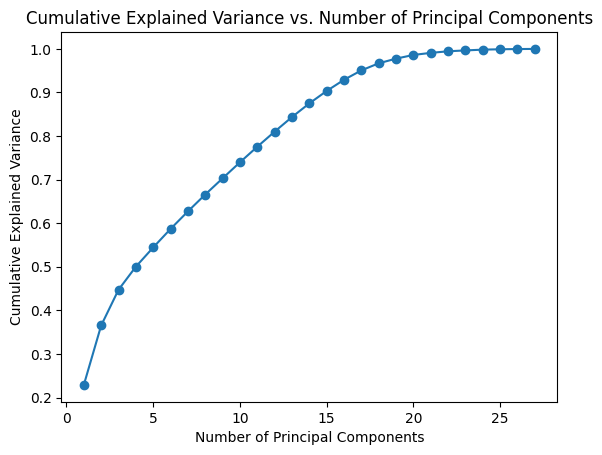

In [208]:
#Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Appliying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Plot the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

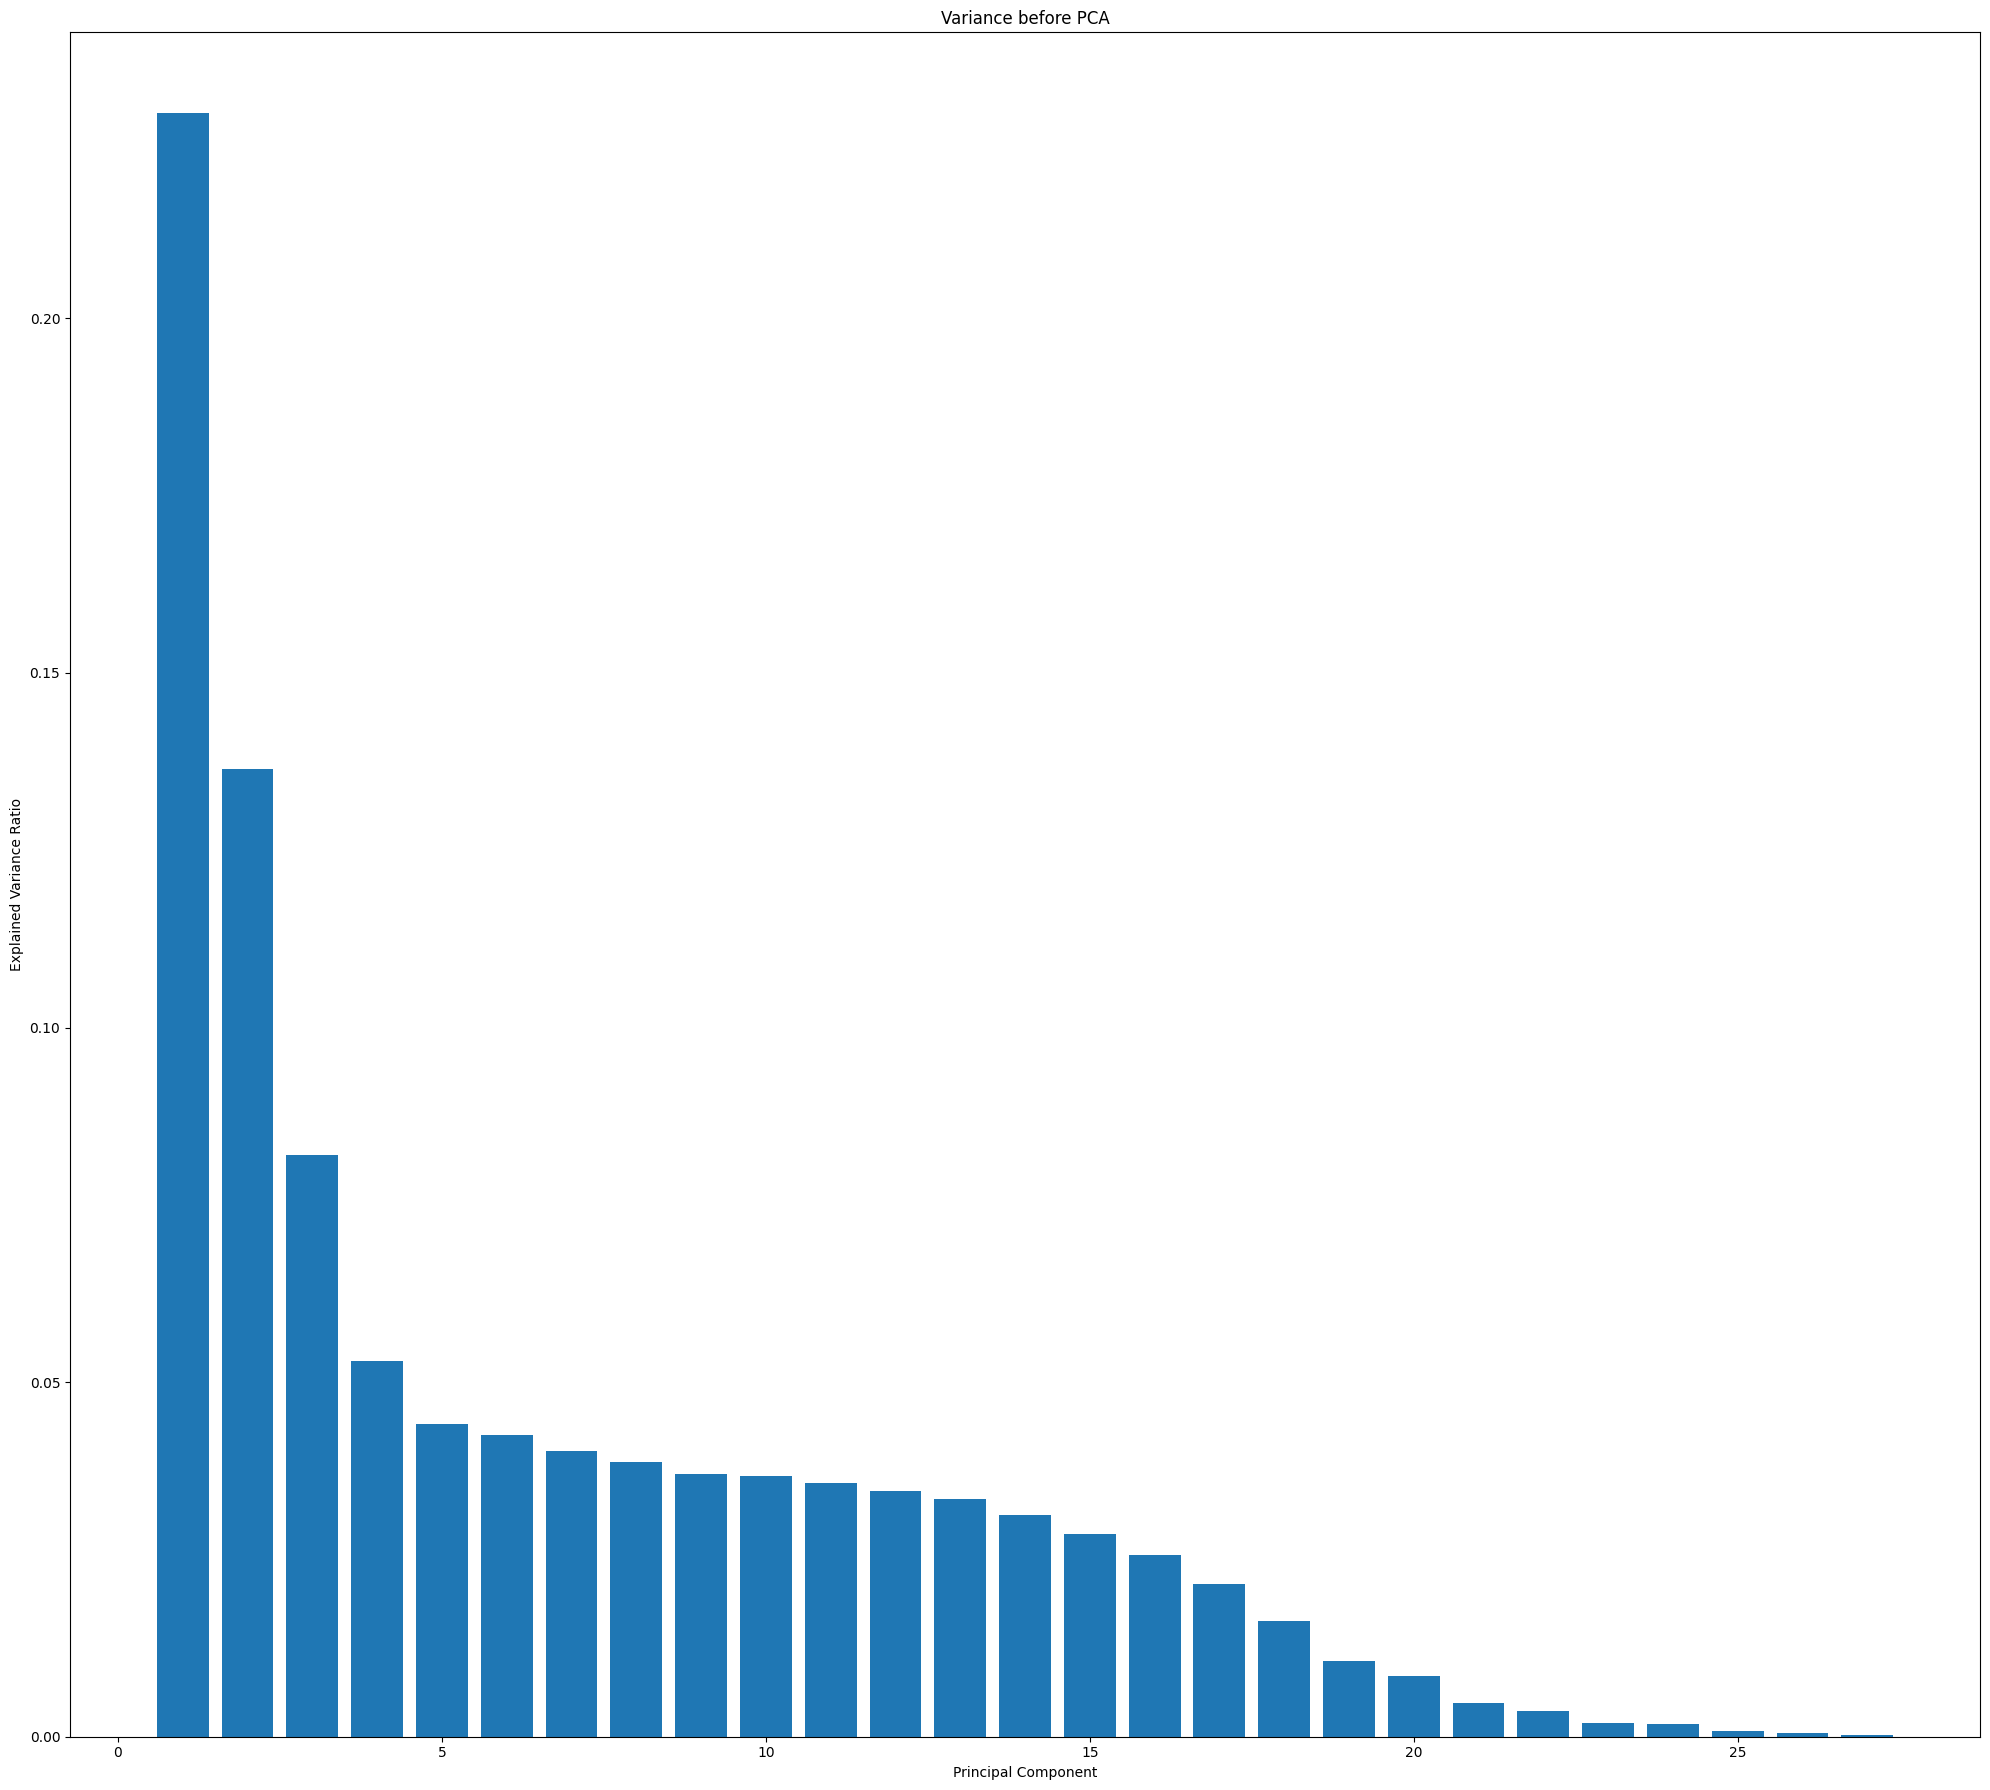

In [209]:
fig, ax = plt.subplots(figsize=(20, 18))
# Plot the explained variance ratio for each principal component
ax.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
ax.set_title('Variance before PCA')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [210]:
target_explained_variance = 0.90
n_components = next(i for i, variance in enumerate(cumulative_explained_variance, 1) if variance >= target_explained_variance)

# Retain only the selected number of principal components
X_pca_selected = X_pca[:, :n_components]

print(f"Number of Principal Components Selected: {n_components}")

Number of Principal Components Selected: 15


In [211]:
# Create column names from 1 to 69
column_names = ["Pca"+str(i) for i in range(1, 16)]

X_eda = pd.DataFrame(X_pca_selected, columns = column_names)
y_eda = pd.DataFrame(y, columns = ['ctr'])
df_eda = pd.concat([X_eda,y_eda],axis=1)

In [212]:
df_eda.describe()

,Pca1,Pca2,Pca3,Pca4,Pca5,Pca6,Pca7,Pca8,Pca9,Pca10,Pca11,Pca12,Pca13,Pca14,Pca15,ctr
count,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,3.991390e+05,399139.000000
mean,-4.678336e-17,-1.110838e-17,7.263170e-18,3.232823e-17,-1.253253e-17,1.367185e-17,6.835925e-18,6.835925e-17,3.190098e-17,5.126943e-17,1.822913e-17,8.544906e-18,1.595049e-17,-1.595049e-17,-1.196287e-17,1.043878
std,2.485892e+00,1.919042e+00,1.487552e+00,1.196247e+00,1.091299e+00,1.071372e+00,1.042109e+00,1.023233e+00,1.000410e+00,9.970215e-01,9.819867e-01,9.671120e-01,9.506713e-01,9.197444e-01,8.779061e-01,3.915530
min,-2.858157e+00,-5.233939e+01,-1.441408e+02,-9.296475e+01,-1.025008e+02,-4.441029e+01,-9.080860e+01,-2.615793e+01,-4.226491e+00,-3.404961e+01,-3.123108e+01,-7.756523e+01,-4.207263e+01,-1.991439e+01,-3.035089e+01,0.000000
25%,-7.982019e-01,-1.120107e-01,-5.959037e-01,-6.375462e-01,-5.665472e-01,-6.655437e-01,-4.439598e-01,-6.402284e-01,-9.002047e-01,-7.782576e-01,-5.634508e-01,-5.587852e-01,-5.355887e-01,-6.297930e-01,-5.795005e-01,0.000000
50%,-4.961777e-01,3.363811e-01,-2.792774e-01,-6.433800e-02,-8.338365e-03,7.623026e-03,3.523338e-03,3.053372e-02,8.395926e-02,-9.358806e-04,-6.180899e-02,-1.069485e-01,-2.640355e-02,-1.019732e-02,-2.740299e-02,0.000000
75%,5.388098e-02,5.476060e-01,3.683188e-01,6.444802e-01,5.528621e-01,6.568814e-01,4.806637e-01,6.741089e-01,8.139047e-01,7.821252e-01,4.849563e-01,4.566727e-01,4.751751e-01,6.089112e-01,5.470584e-01,0.381213
max,4.911881e+02,4.005318e+02,6.243819e+01,4.143678e+01,1.134852e+02,4.124359e+01,1.038009e+02,3.578151e+01,7.956624e+00,4.083832e+01,2.688669e+01,4.131515e+01,3.260001e+01,7.414606e+00,4.705825e+01,98.201508


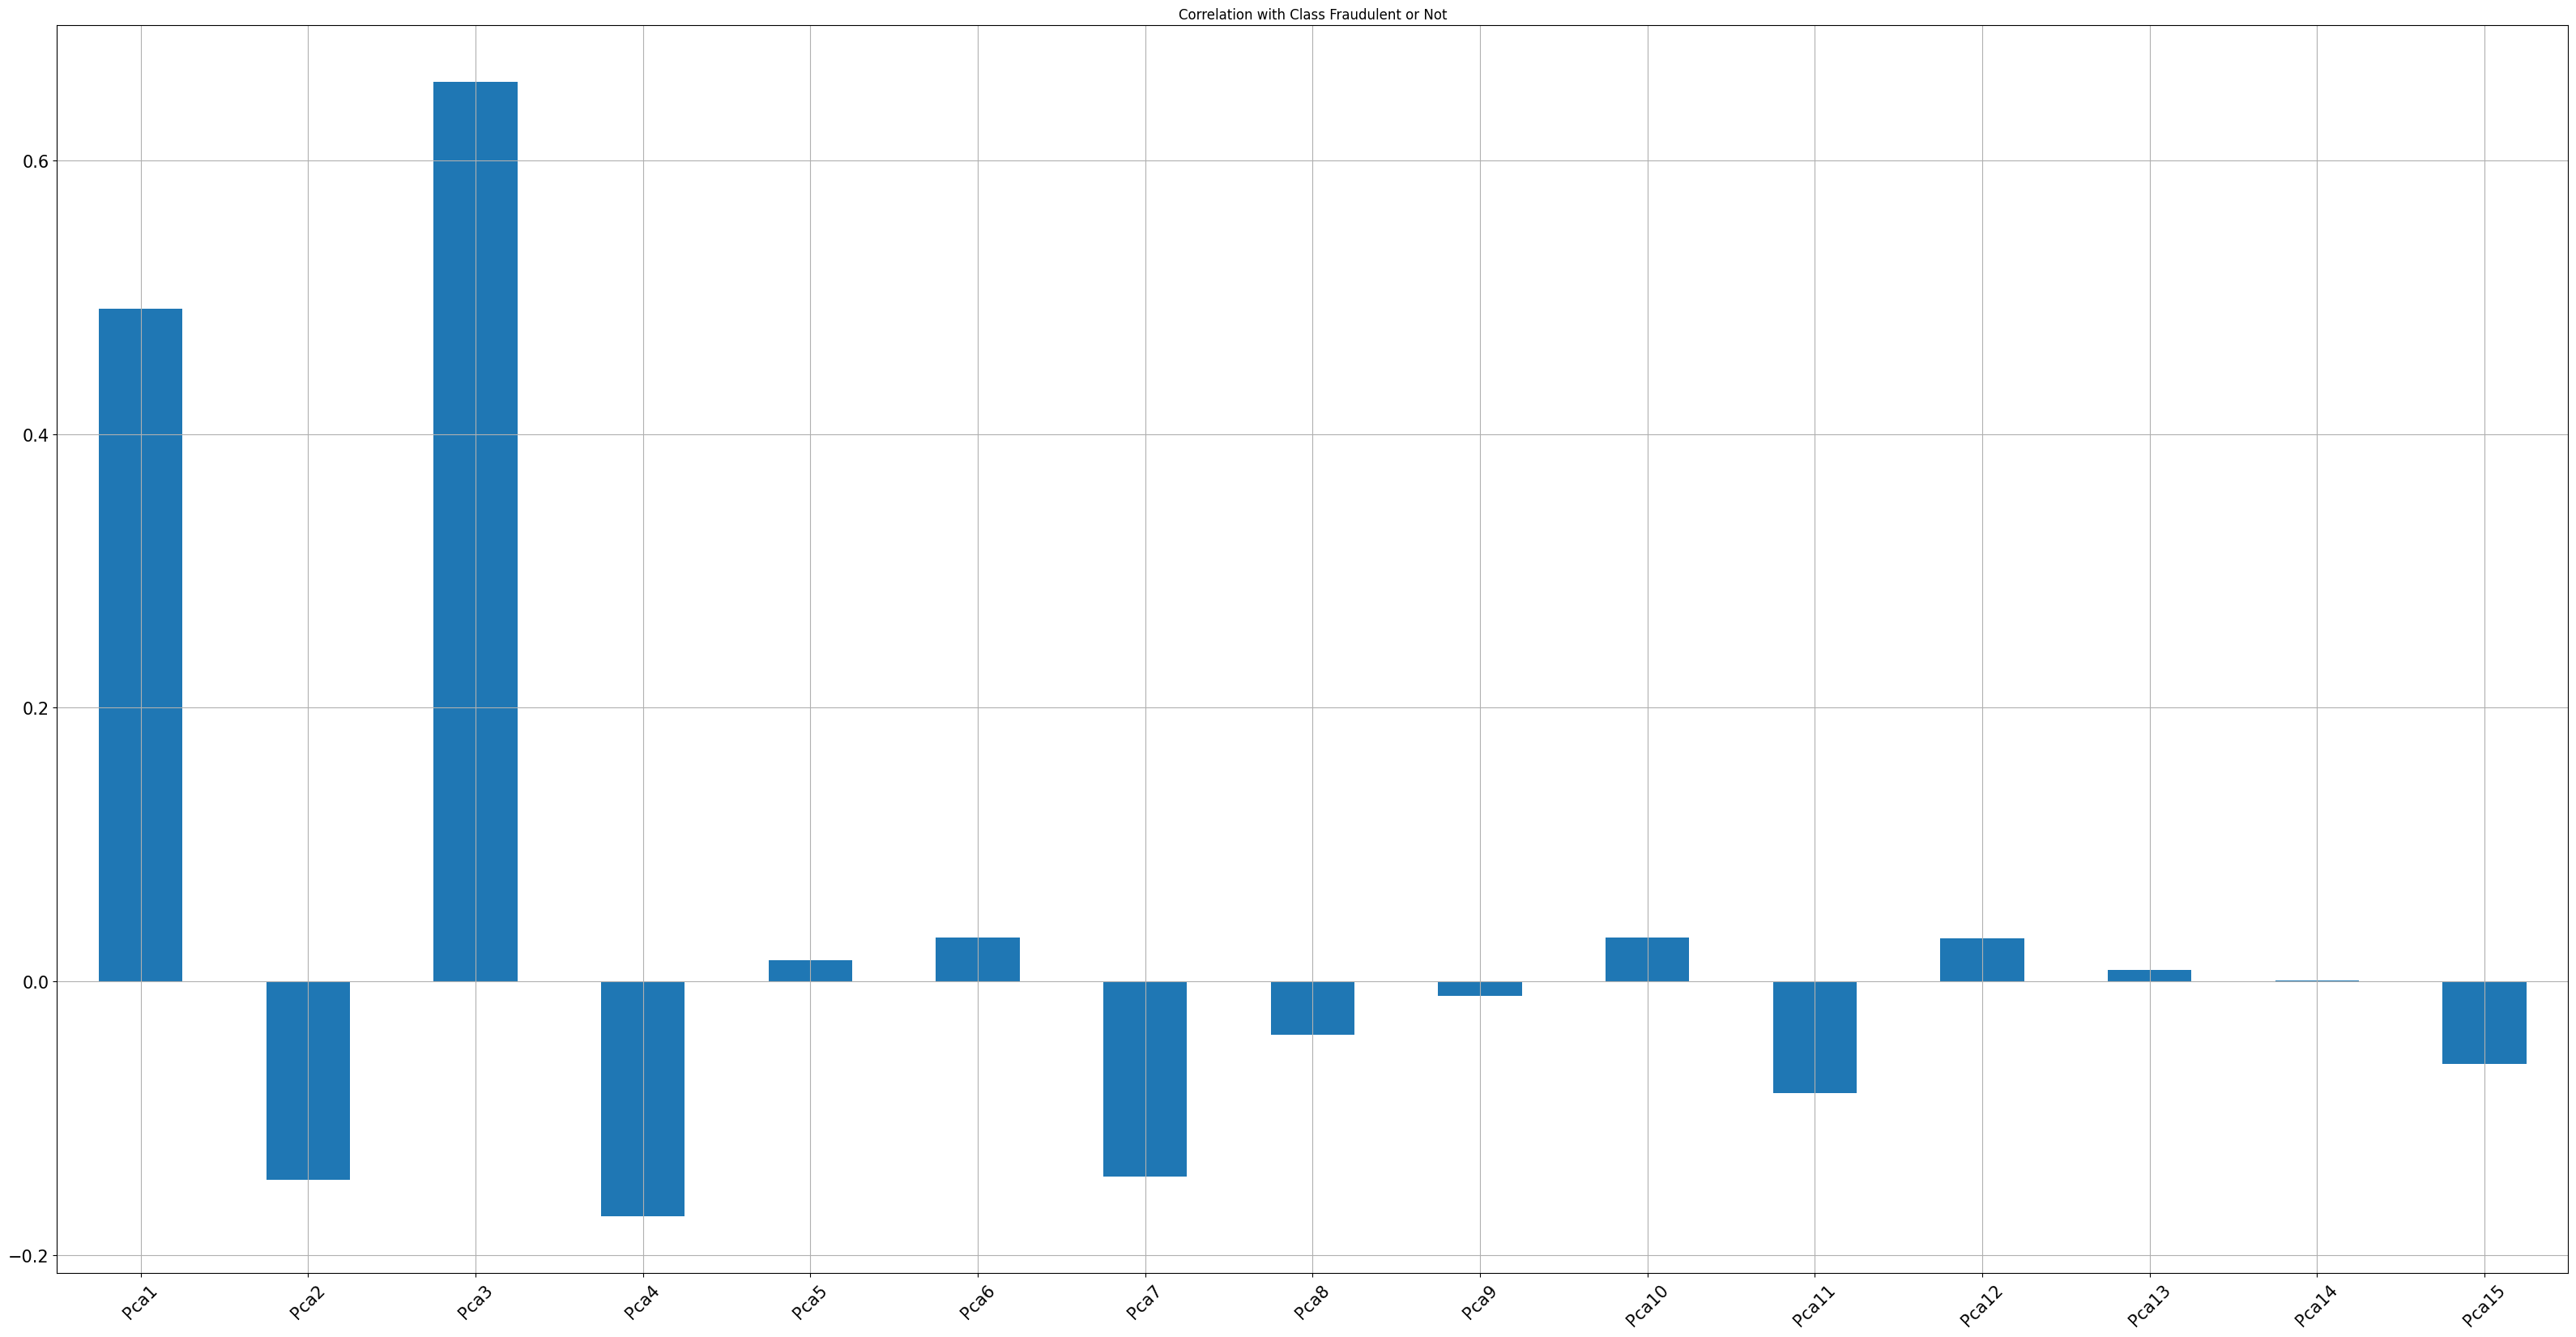

In [213]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = df_eda.drop(columns = ['ctr'])   # drop non numerical columns
data2.corrwith(df_eda.ctr).plot.bar(
        figsize = (40, 20), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [214]:
# Check if there are any NaN values in the DataFrame
has_nan = df_eda.isna().values.any()
print("Any NaN values in the DataFrame?", has_nan)

Any NaN values in the DataFrame? False


In [215]:
nan_counts = df_eda.isna().sum()
print("\nNaN values per column:")
print(nan_counts)


NaN values per column:
Pca1     0
Pca2     0
Pca3     0
Pca4     0
Pca5     0
Pca6     0
Pca7     0
Pca8     0
Pca9     0
Pca10    0
Pca11    0
Pca12    0
Pca13    0
Pca14    0
Pca15    0
ctr      0
dtype: int64


In [216]:
df_eda = df_eda.dropna()

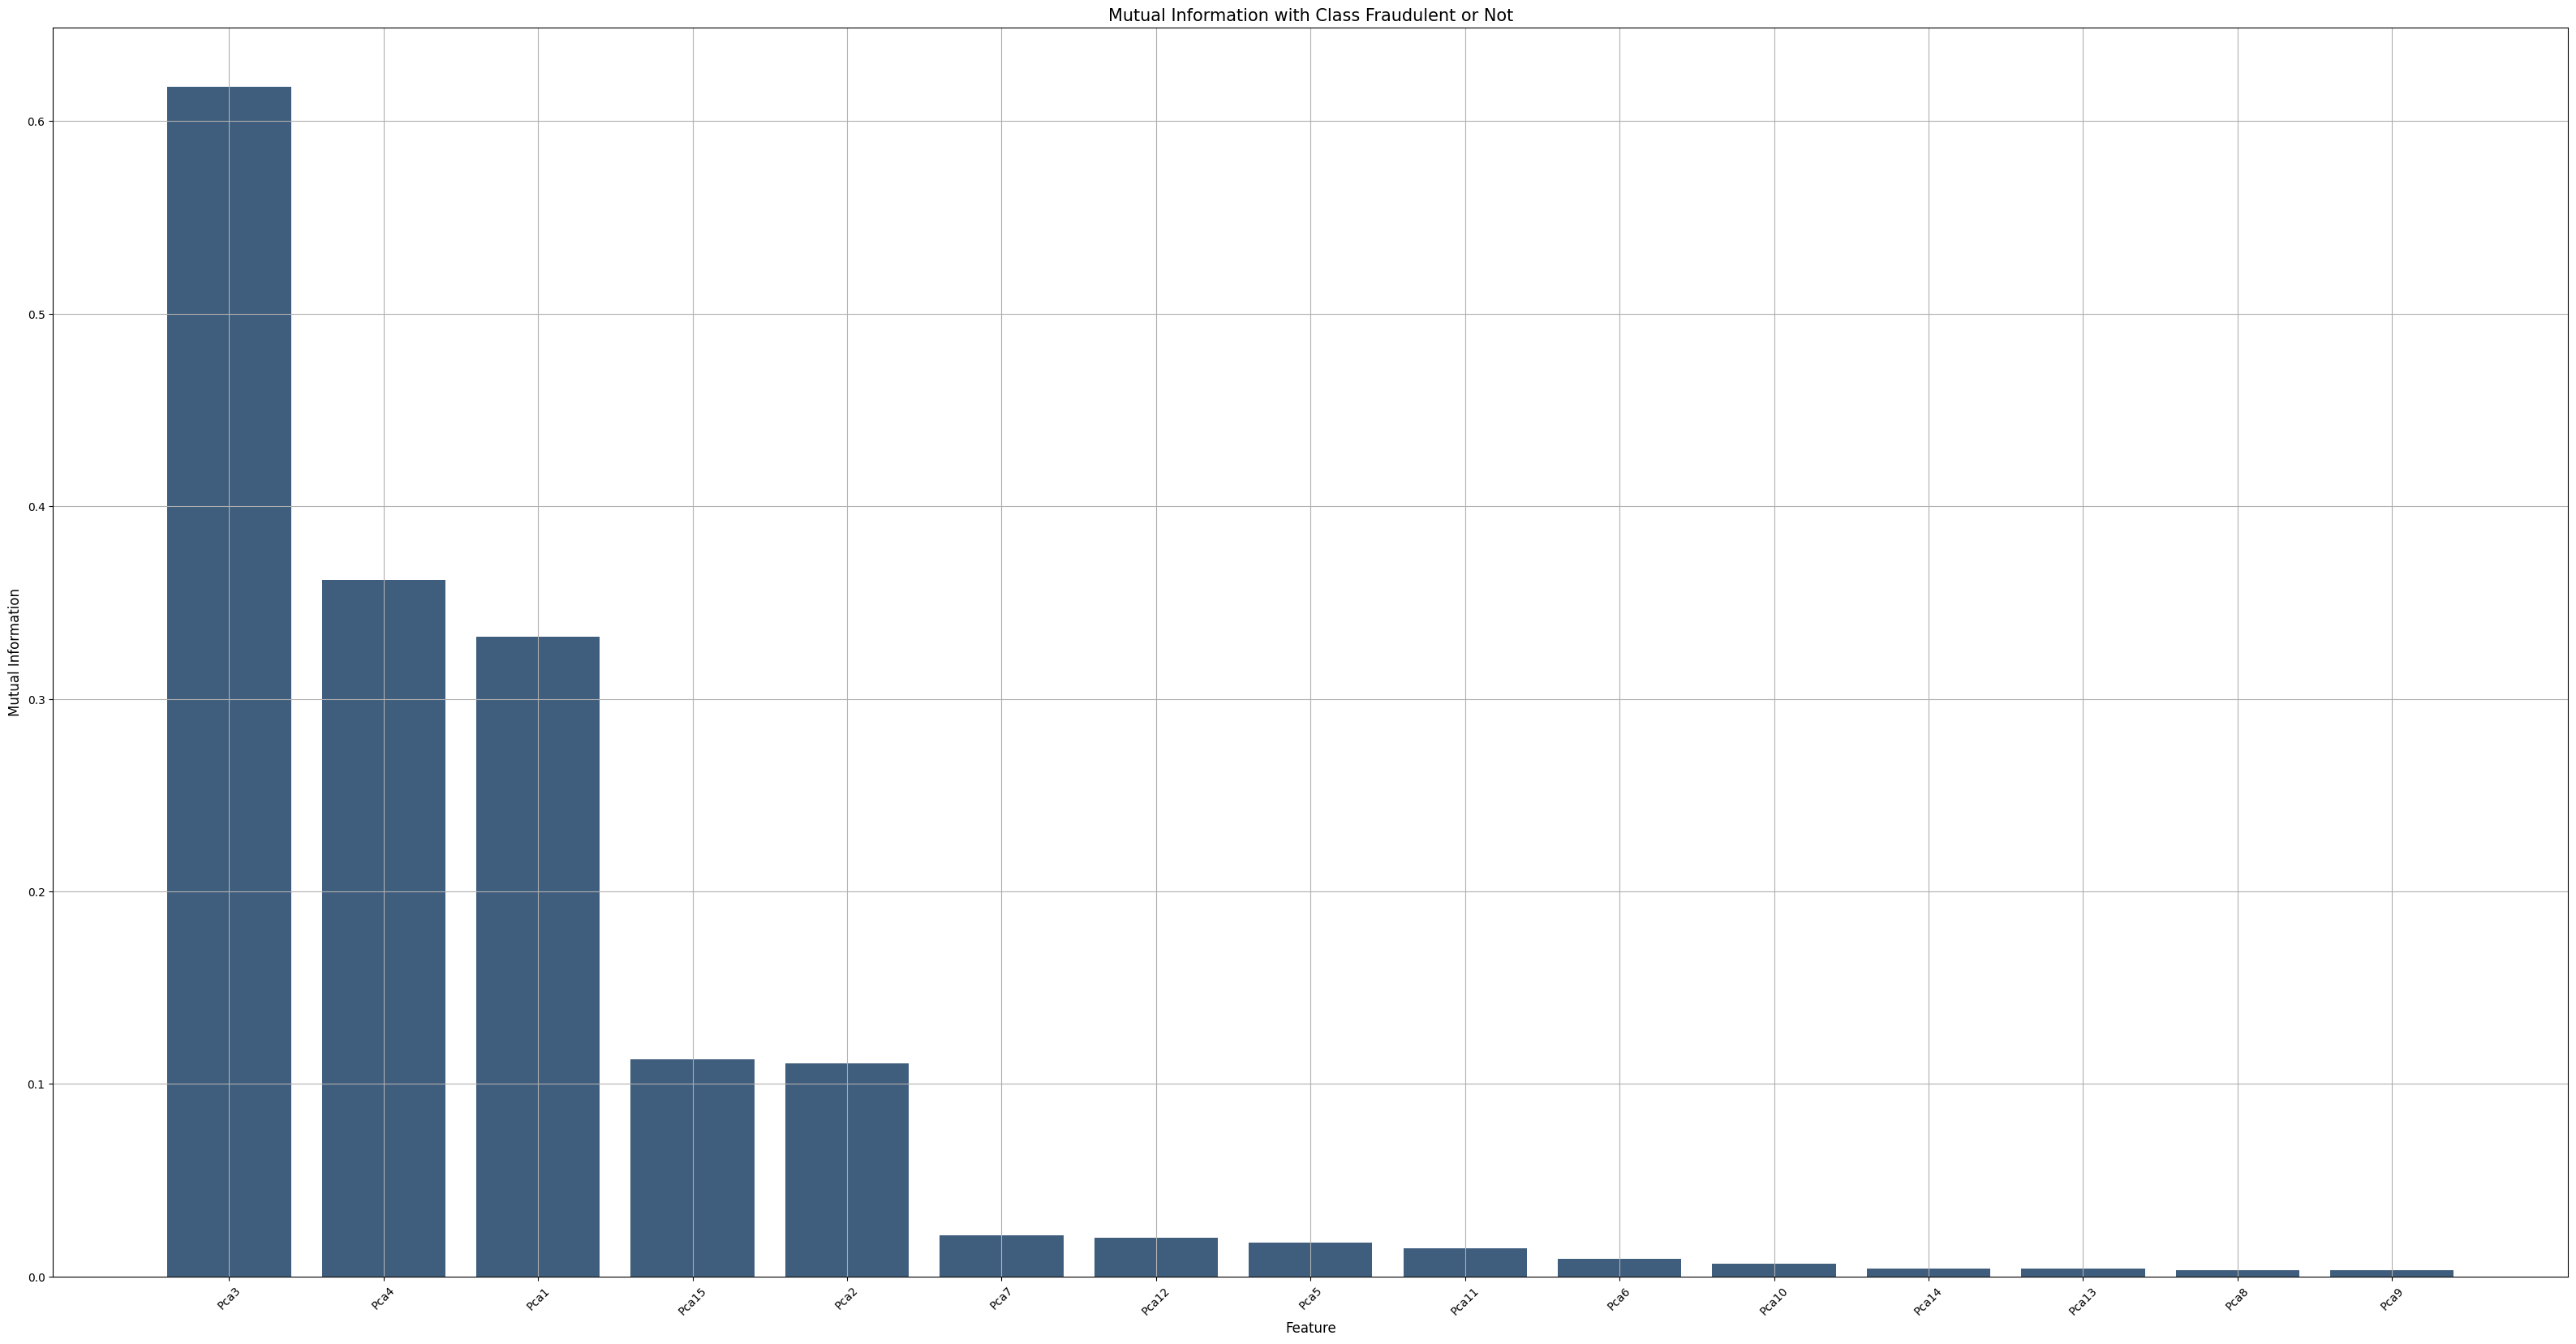

In [217]:
# Drop non-numerical columns
data2 = df_eda.drop(columns=['ctr'])

# Calculate Mutual Information with the target variable
mi_values = mutual_info_regression(data2, df_eda['ctr'])

# Create a DataFrame with feature names and their corresponding MI values
mi_df = pd.DataFrame({'Feature': data2.columns, 'MI': mi_values})

# Sort the DataFrame by MI values
mi_df = mi_df.sort_values(by='MI', ascending=False)

# Plot the Mutual Information values
plt.figure(figsize=(40, 20))
plt.bar(mi_df['Feature'], mi_df['MI'], color='#3F5D7D')
plt.title("Mutual Information with Class Fraudulent or Not", fontsize=15)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Mutual Information", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()


#**Splitting the Data into Training, Testing And Validation Sets**

In [218]:
# X is your feature matrix and y is your target vector
# Split the data into training and testing data (80% for training and 20% for testing data)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)

# Split the temporary training data into training and validation data (60% for training and 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Print the sizes of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 239483
Validation set size: 79828
Testing set size: 79828


#**Model Training**

In [219]:
# Create an instance of XGBRegressor
xgb_reg = XGBRegressor(
    objective='reg:squarederror',  # Objective for regression
    max_depth=3,  # Maximum depth of the tree
    learning_rate=0.3,  # Learning rate
    n_estimators=200  # Number of boosting rounds
)

# The sample weights can be used, but in regression, they are less common
# If using sample weights, they should correspond to each sample's weight
# For demonstration, assume weights are provided or can be omitted
sample_weights = [1.0] * len(y_train)  # Example: uniform weights

# Train the model
xgb_reg.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
xgb_pred = xgb_reg.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

# Print regression metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3.390184303341888
Mean Absolute Error: 0.5103397372161674
R^2 Score: 0.7826470634547676
